In [1]:
import requests
import pandas as pd 
import matplotlib as plot 
from pathlib import Path
import matplotlib.pyplot as plt
import os 
import numpy as np
from sqlalchemy import create_engine,text
import seaborn as sns



In [2]:
# # Create a reference path to the file
# database_path = Path("Resources/APY-India.sqlite")


In [3]:
# # Create Engine
# engine = create_engine(f"sqlite:///{database_path}")

In [4]:
# engine

In [5]:
# # Query All Records in the the Database
# query = text("SELECT * FROM APY-India")
# with engine.connect() as conn:
#    APY-India = conn.execute(query)
    

In [6]:
# Store filepath in a variable
file = Path("APY India .csv")


In [ ]:
# Narrow down the data to 2010 to 2020
narrow_year_df = df[df["Crop_Year"]>2010]
narrow_year_df

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
14,Andaman and Nicobar Island,NICOBARS,Arecanut,2011,Rabi,957.0,1090.0,1.14
15,Andaman and Nicobar Island,NICOBARS,Arecanut,2012,Rabi,959.0,1362.0,1.42
16,Andaman and Nicobar Island,NICOBARS,Arecanut,2013,Rabi,890.5,846.0,0.95
17,Andaman and Nicobar Island,NICOBARS,Arecanut,2014,Rabi,876.5,639.0,0.73
18,Andaman and Nicobar Island,NICOBARS,Arecanut,2015,Rabi,888.5,83.0,0.09
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


In [ ]:
# Reorganize the columns using double brackets
organized_df = df[['State','Production', ]]
organized_df.head()

,State,Production
0,Andaman and Nicobar Island,3415.0
1,Andaman and Nicobar Island,2277.0
2,Andaman and Nicobar Island,3060.0
3,Andaman and Nicobar Island,2660.0
4,Andaman and Nicobar Island,3120.0


In [ ]:
# organized_df.plot(marker="d", linestyle='-', color=['blue', 'red','green'], figsize= (15,7),)
# plt.title('State vs.  Production')
# plt.xlabel('State', 'rolling'(50).mean())
# plt.ylabel('Production','rolling'(50).mean())

# # plt.xticks(rotation=0.4)  # Rotate x-axis labels if needed
# # plt.legend(['Autumn', 'Summer','Whole Year'])
# # plt.grid(True)  # Add gridlines for better readability
# plt.show()

In [ ]:
organized_df.plot(marker="d", linestyle='-', color=['blue', 'red','green'])
plt.title('State vs.  Production')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

In [ ]:
# df.count()

In [ ]:
# df.describe()

In [ ]:
# Reorganize the columns using double brackets
organized_df = df[['State', 'Crop_Year','Crop','Production', ]]
organized_df.head()

,State,Crop_Year,Crop,Production
0,Andaman and Nicobar Island,2007,Arecanut,3415.0
1,Andaman and Nicobar Island,2007,Arecanut,2277.0
2,Andaman and Nicobar Island,2008,Arecanut,3060.0
3,Andaman and Nicobar Island,2008,Arecanut,2660.0
4,Andaman and Nicobar Island,2009,Arecanut,3120.0


In [ ]:
# Creating a dataFrame using crop year, crop & production 
crop_year_df = narrow_year_df.groupby(["Crop_Year","Crop"])['Production'].sum().reset_index()
crop_year_df

,Crop_Year,Crop,Production
0,2011,Arecanut,1976272.0
1,2011,Arhar/Tur,2466955.0
2,2011,Bajra,12420188.0
3,2011,Banana,12718128.0
4,2011,Barley,1601559.0
...,...,...,...
514,2020,Tobacco,6.0
515,2020,Turmeric,4186.0
516,2020,Urad,13351.0
517,2020,Wheat,937003.0


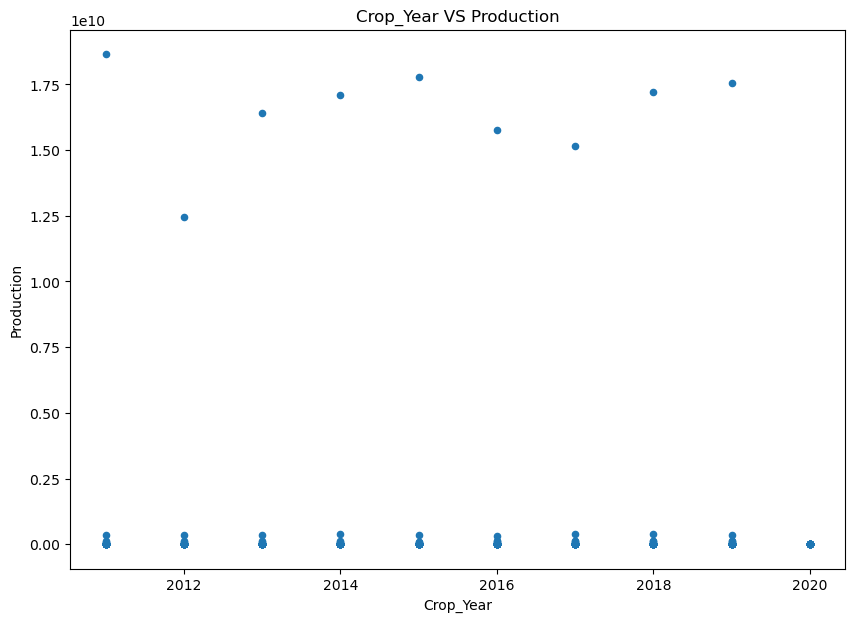

In [ ]:
# dipling the acater plot by crop-yean and prodections 

crop_year_df.plot.scatter(x='Crop_Year', y='Production', title='Crop_Year VS Production', figsize=(10, 7))
# plt.grid(True) 
plt.show()

In [ ]:
# Extract selected crops like rice, maize & potatos 
# Top 10 Crops product in india 

option = ["Rice","Maize","Potato","Legume","Tea","Jute","Wheat","Coffee","Cotton","Groundnut"]
result_df = crop_year_df[crop_year_df["Crop"].isin(option)].reset_index()
result_df.head(10)

,index,Crop_Year,Crop,Production
0,17,2011,Groundnut,6988127.0
1,21,2011,Jute,10734936.0
2,24,2011,Maize,22225075.0
3,36,2011,Potato,27576225.0
4,39,2011,Rice,105059032.0
5,52,2011,Wheat,103115997.0
6,71,2012,Groundnut,4758676.0
7,75,2012,Jute,10354572.0
8,78,2012,Maize,23344091.0
9,90,2012,Potato,30468097.0


c:\Users\bakts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


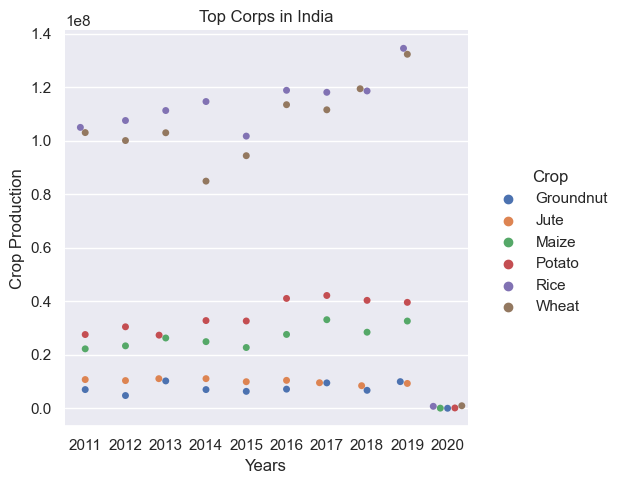

In [ ]:
# Create plot
g = sns.catplot(y="Production", x = "Crop_Year",hue="Crop" , data= result_df,  kind="swarm" )
# hue="Crop" 

sns.set(rc={'figure.figsize':(100,100)})
g.set_axis_labels("Years", "Crop Production")
g.despine(left=True)
plt.title("Top Corps in India", loc = "center")
g.tight_layout()

c:\Users\bakts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\bakts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


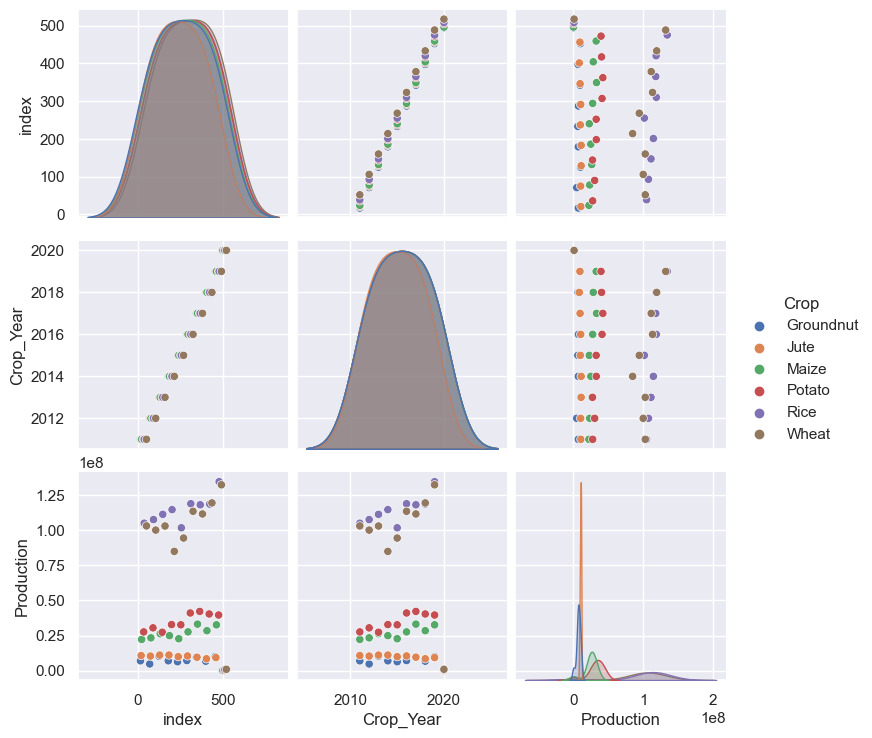

In [ ]:
sns.pairplot( result_df, hue= "Crop", size=2.5);



c:\Users\bakts\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


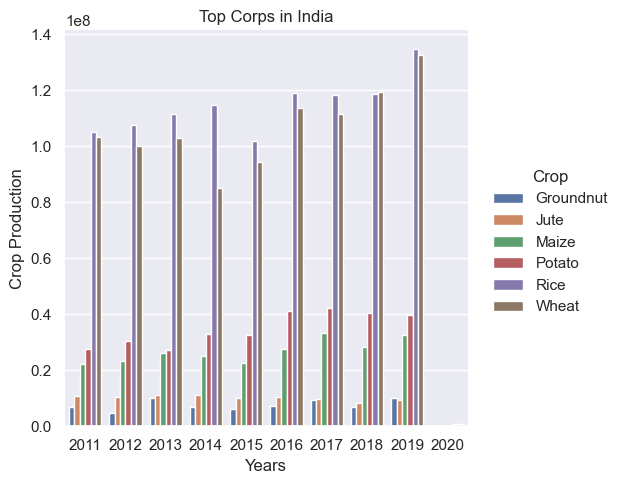

In [ ]:
# Create plot
g = sns.catplot(y="Production", x = "Crop_Year",hue="Crop" , data= result_df,  kind="bar" )
# hue="Crop" 

sns.set(rc={'figure.figsize':(100,100)})
g.set_axis_labels("Years", "Crop Production")
g.despine(left=True)
plt.title("Top Corps in India", loc = "center")
g.tight_layout()

In [ ]:
# display indain state 
India_State = df['State'].unique()

# Check unique values in the 'State' column and convert to list
print(India_State)

['Andaman and Nicobar Island' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'CHANDIGARH' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Daman and Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Laddak'
 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland'
 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Telangana' 'THE DADRA AND NAGAR HAVELI' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [ ]:
unique_Crop_year = df['Crop_Year'].unique()

# Check unique values in the 'Crop_Year' column and convert to list
print(unique_Crop_year)

[2007 2008 2009 2000 2001 2002 2003 2004 2005 2006 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 1997 1998 1999 2020]


In [ ]:
unique_values = df['Crop'].unique()
print(unique_values)

['Arecanut' 'Arhar/Tur' 'Banana' 'Black pepper' 'Cashewnut' 'Coconut '
 'Cowpea(Lobia)' 'Dry chillies' 'Ginger' 'Groundnut' 'Maize'
 'Moong(Green Gram)' 'Oilseeds total' 'Other Kharif pulses'
 'other oilseeds' 'Rapeseed &Mustard' 'Rice' 'Sesamum' 'Sugarcane'
 'Sunflower' 'Sweet potato' 'Tapioca' 'Turmeric' 'Urad' 'Bajra'
 'Castor seed' 'Coriander' 'Cotton(lint)' 'Garlic' 'Gram' 'Guar seed'
 'Horse-gram' 'Jowar' 'Linseed' 'Masoor' 'Mesta' 'Niger seed' 'Onion'
 'Other  Rabi pulses' 'Potato' 'Ragi' 'Safflower' 'Sannhamp'
 'Small millets' 'Soyabean' 'Tobacco' 'Wheat' 'Peas & beans (Pulses)'
 'Jute' 'Barley' 'Khesari' 'Moth' 'Other Cereals' 'Cardamom'
 'Other Summer Pulses' nan]


In [ ]:
unique_Production = df['Production'].unique()
print(unique_Production)

[  3415.   2277.   3060. ... 113106.  15280.   9944.]


In [ ]:
data = [10, 20, 30, 40]
index = ['A', 'B', 'C', 'D']

# Create the Pandas Series with scalar values and index
series = pd.Series(data, index=index)

print(series)

In [ ]:
# organized_df.plot(marker="d", linestyle='-', color=['blue', 'red','green'])
# plt.title('State vs.  Production')
# plt.xlabel('State')
# plt.ylabel('Production')
# # plt.xticks(rotation=0.4)  # Rotate x-axis labels if needed
# # plt.legend(['Autumn', 'Summer','Whole Year'])
# # plt.grid(True)  # Add gridlines for better readability
# plt.show()

In [ ]:
# organized_df.plot(marker='o', linestyle='-', color=['blue', 'red','green'])
# plt.title('Crop_year vs. Production')
# plt.xlabel('Crop_year')
# plt.ylabel('Production')
# # plt.xticks(rotation=0.4)  # Rotate x-axis labels if needed
# # plt.legend(['Autumn', 'Summer','Whole Year'])
# # plt.grid(True)  # Add gridlines for better readability
# plt.show()

In [ ]:
# df.plot(marker='o', linestyle='-', color=['blue', 'red','green'])
# plt.title('Autumn vs. Summer Production')
# plt.xlabel('Season')
# plt.ylabel('Production')
# plt.xticks(rotation=0.4)  # Rotate x-axis labels if needed
# plt.legend(['Autumn', 'Summer','Whole Year'])
# plt.grid(True)  # Add gridlines for better readability
# plt.show()